In [296]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [297]:
tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks=tracks.droplevel(0,axis=1)
tracks.drop(index=tracks[tracks.subset=='large'].index, inplace=True)
tracks_cut=['composer','comments', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
            'favorites','listens','interest','bit_rate', 'duration','split','subset']
tracks.drop(tracks_cut,axis=1,inplace=True)

In [298]:
#estrazioni da librosa_mp3 di 10  secondi dopo i primi 10 features rolloff
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
ts.shape

(1028, 1209)

In [304]:
ts_df=pd.merge(tracks,ts, on='track_id')
ts_df.head(10)

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,4850,Classical,13,206,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,...,0.429477,0.438678,0.423448,0.416010,0.414990,0.434620,0.557168,0.779985,0.852099,0.806474
1,4851,Classical,14,207,0.139737,0.162770,0.188715,0.196280,0.222101,0.236519,...,0.100511,0.092096,0.077473,0.062344,0.058620,0.039428,0.035532,0.036547,0.003289,0.039476
2,5009,Old-Time / Historic,15,208,0.097878,0.141881,0.181742,0.295769,0.343891,0.415385,...,0.396982,0.354043,0.370011,0.368628,0.309365,0.282796,0.272292,0.276301,0.301752,0.270572
3,5012,Old-Time / Historic,16,209,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.263610,0.330493,0.367824,0.399824,0.282295
4,5013,Old-Time / Historic,17,210,0.134297,0.198303,0.286986,0.377489,0.289663,0.278561,...,0.469473,0.409380,0.320596,0.243092,0.350757,0.478701,0.517602,0.362054,0.187761,0.319275
5,5014,Old-Time / Historic,18,211,0.269224,0.301459,0.328370,0.402333,0.456997,0.459622,...,0.476501,0.349477,0.380182,0.454206,0.413036,0.351530,0.320287,0.431377,0.362822,0.272571
6,5015,Old-Time / Historic,19,212,0.290050,0.284146,0.260731,0.307462,0.387965,0.394359,...,0.110240,0.085223,0.096185,0.115173,0.110524,0.082876,0.085809,0.126982,0.152246,0.140030
7,5016,Old-Time / Historic,20,213,0.000000,0.029406,0.052735,0.086752,0.107168,0.151446,...,0.293000,0.259810,0.187188,0.138554,0.095164,0.054514,0.141089,0.347538,0.420764,0.467939
8,5017,Old-Time / Historic,21,214,0.482392,0.448898,0.437062,0.434985,0.438651,0.401103,...,0.408443,0.449517,0.455118,0.520922,0.506554,0.516933,0.553757,0.581431,0.516741,0.421150
9,5018,Old-Time / Historic,22,215,0.000000,0.044670,0.079844,0.128957,0.134626,0.089243,...,0.229202,0.199995,0.177497,0.161414,0.223105,0.295313,0.250995,0.167803,0.176338,0.206091


# Check genres

In [305]:
tracks[tracks['genre_top']=='Old-Time / Historic'].head(10)

,genre_top
track_id,
5009,Old-Time / Historic
5012,Old-Time / Historic
5013,Old-Time / Historic
5014,Old-Time / Historic
5015,Old-Time / Historic
5016,Old-Time / Historic
5017,Old-Time / Historic
5018,Old-Time / Historic
5019,Old-Time / Historic


In [306]:
# find index from Old-Time / Historic track
ts_df.loc[ts_df.track_id == 5020]

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
11,5020,Old-Time / Historic,24,217,0.367042,0.482958,0.623746,0.71443,0.690435,0.658489,...,0.508163,0.381101,0.431955,0.521264,0.573891,0.367277,0.21279,0.288925,0.298324,0.317571


In [307]:
tracks[tracks['genre_top']=='Classical'].head(10)

,genre_top
track_id,
4850,Classical
4851,Classical
10026,Classical
10027,Classical
10028,Classical
10029,Classical
10030,Classical
10032,Classical
10033,Classical


In [308]:
# find index from Classical track
ts_df.loc[ts_df.track_id == 10030]

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
31,10030,Classical,44,330,0.179002,0.18571,0.124128,0.116051,0.087012,0.093779,...,0.0,0.011953,0.014171,0.001313,0.009331,0.100214,0.235154,0.232633,0.211894,0.228516


In [337]:
cut_columns=['track_id','Unnamed: 0','Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)

In [404]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

In [405]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) #(mu=0., std=1.)  # Rescale time series
ts_scaled= scaler.fit_transform(ts) #.values.reshape(1,-1))

In [407]:
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape

(1028, 1206)

In [412]:
ts= pd.DataFrame(ts_scaled, index =ts.index,columns=ts.columns)

In [409]:
ts.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,-0.798031,-0.961996,-1.005351,-0.976706,-0.937585,-0.944802,-0.939497,-0.935941,-0.975143,-0.961482,...,0.630872,0.688971,0.592804,0.545833,0.539396,0.663349,1.437181,2.844164,3.299525,3.011428
1,-1.010990,-0.891834,-0.757604,-0.718467,-0.584884,-0.510293,-0.515640,-0.519784,-0.506102,-0.577836,...,-1.213927,-1.257460,-1.333116,-1.411386,-1.430652,-1.529939,-1.550094,-1.544844,-1.716905,-1.529692
2,-2.024219,-1.731390,-1.466120,-0.707279,-0.387037,0.088750,0.818159,0.825593,0.239429,0.189594,...,-0.033722,-0.319474,-0.213213,-0.222414,-0.616801,-0.793613,-0.863520,-0.836841,-0.667463,-0.874968
3,-1.675685,-1.571273,-1.139144,-0.693439,-0.014215,0.823107,0.569703,-1.108843,-0.717576,0.201622,...,-0.307160,0.886180,0.924603,-0.950875,-1.645671,-0.491908,-0.040901,0.210826,0.426605,-0.365915
4,-1.509787,-1.144686,-0.638830,-0.122586,-0.623561,-0.686884,0.207147,0.176970,-0.255449,-0.873102,...,0.402098,0.059324,-0.447114,-0.889204,-0.275072,0.454738,0.676635,-0.210631,-1.204822,-0.454647


# Matrix Profile

In [410]:
from matrixprofile import *

In [413]:
ts1=ts.loc[[11]] #Old-Time/Historic track
ts2=ts.loc[[31]]   #Classical track

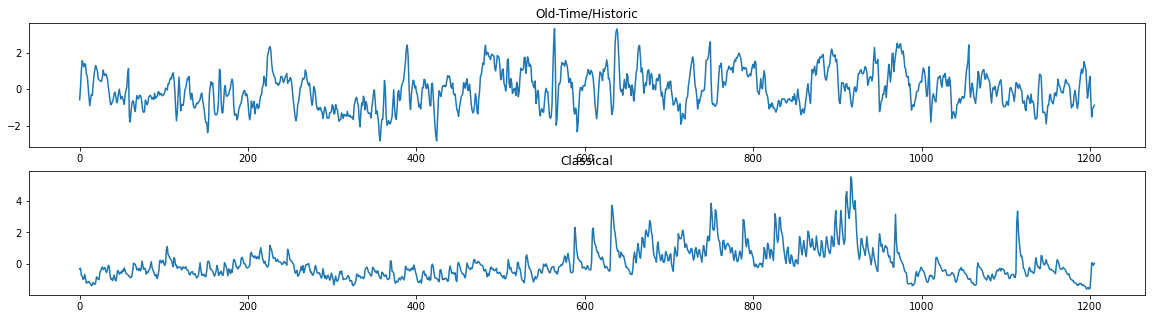

In [414]:
fig,ax = plt.subplots(2,1, figsize=(20,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T))
ax[0].set_title('Old-Time/Historic')
ax[1].plot(np.squeeze(ts2.to_numpy().T))
ax[1].set_title('Classical')

plt.show()

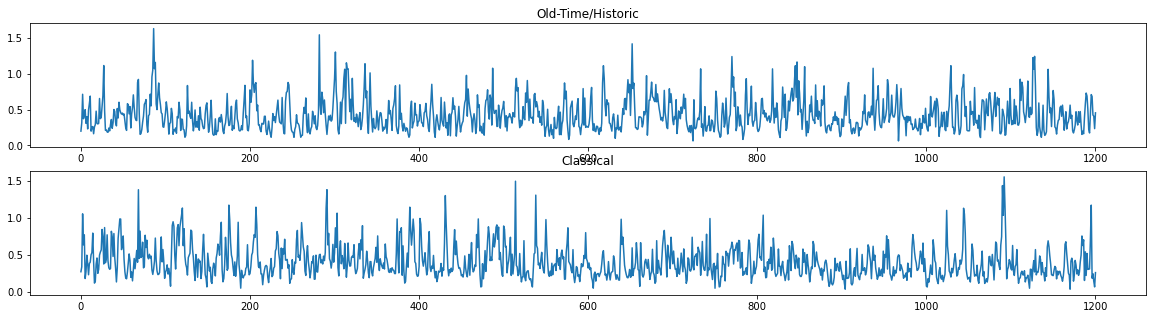

In [415]:
w = 6
mp1, mpi1 = matrixProfile.stomp((np.squeeze(ts1.to_numpy()).T), w)
mp2, mpi2 =matrixProfile.stomp((np.squeeze(ts2.to_numpy()).T), w)


fig,ax=plt.subplots(2,1,figsize=(20,5))
ax[0].plot(mp1)
ax[0].set_title('Old-Time/Historic')
ax[1].plot(mp2)
ax[1].set_title('Classical')

plt.show()

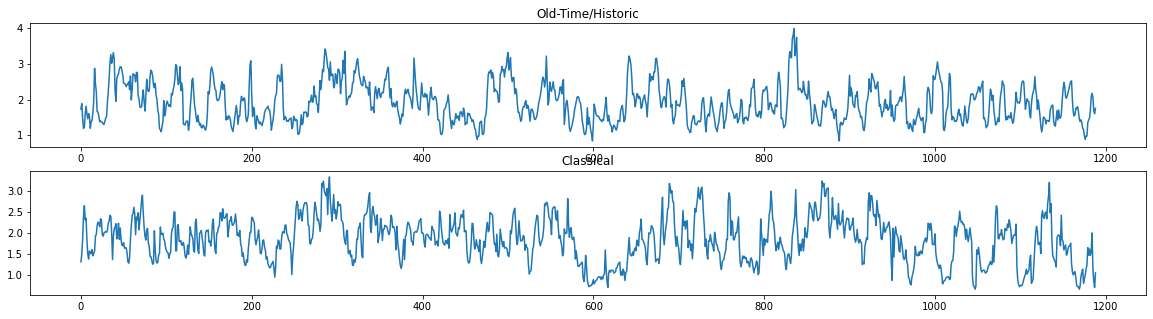

In [474]:
w = 18
mp1, mpi1 = matrixProfile.stomp((np.squeeze(ts1.to_numpy()).T), w)
mp2, mpi2 =matrixProfile.stomp((np.squeeze(ts2.to_numpy()).T), w)

fig,ax=plt.subplots(2,1,figsize=(20,5))
ax[0].plot(mp1)
ax[0].set_title('Old-Time/Historic')
ax[1].plot(mp2)
ax[1].set_title('Classical')

plt.show()

# Motif Discovery

In [501]:
mo1, mod1  = motifs.motifs(np.squeeze(ts1.to_numpy().T), (mp1, mpi1), max_motifs=5)
mo2, mod2 = motifs.motifs(np.squeeze(ts2.to_numpy().T), (mp2,mpi2) ,max_motifs=5)

In [502]:
print('Old-Time / Historic motif:',mo1)
print('Classical motif:',mo2)

Old-Time / Historic motif: [[23, 242, 599, 888], [204, 372, 464, 710, 732, 1176], [74, 256, 422, 589, 612, 765, 825, 866, 916, 956, 1062, 1147], [95, 183, 517, 855, 987, 1038], [141, 622, 1125]]
Classical motif: [[611, 971, 1017, 1047, 1169], [594, 1098, 1187], [0, 226, 247, 632, 793, 831, 1113], [950, 1142], [525, 583, 783, 1061]]


In [503]:
print('Old-Time/Historic mod:',mod1)
print('Classical mod :',mod2)

Old-Time/Historic mod: [0.8390784019987285, 0.8824849793925909, 1.015336688153508, 1.0750189675229105, 1.0903575151739293]
Classical mod : [0.6670383228758745, 0.7070385072180044, 0.8074089080182443, 0.8751995317078445, 1.0291355547475651]


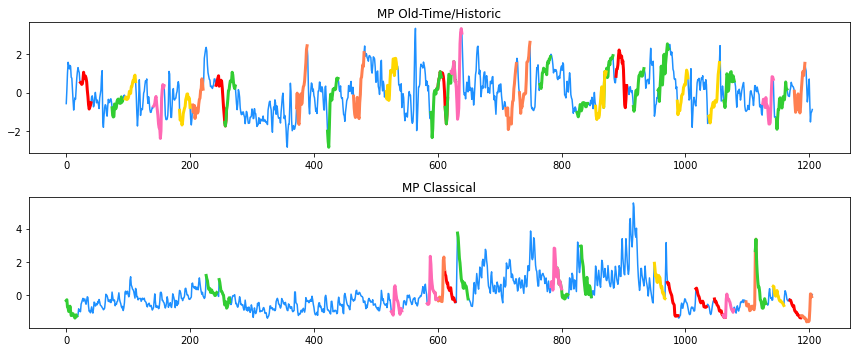

In [522]:
fig,ax=plt.subplots(2,1,figsize=(12,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T),color='dodgerblue')
colors = ['r', 'coral', 'limegreen', 'gold', 'hotpink'][:len(mo1)]
for m, d, c in zip(mo1, mod1, colors):
    for i in m:
        m_shape = ts1.T.values[i:i+w]
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=3)
        ax[0].set_title('MP Old-Time/Historic')
ax[1].plot(np.squeeze(ts2.to_numpy().T),color='dodgerblue')
colors = ['r', 'coral', 'limegreen', 'gold', 'hotpink'][:len(mo2)]
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape = ts2.T.values[i:i+w]
        ax[1].plot(range(i,i+w), m_shape, color=c, lw=3)
        ax[1].set_title('MP Classical')

plt.tight_layout()
plt.show()

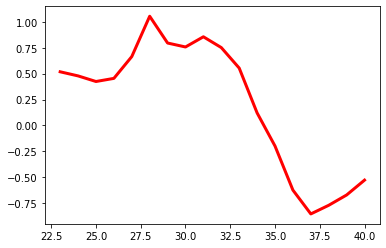

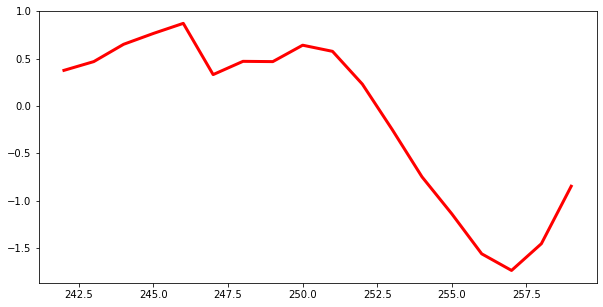

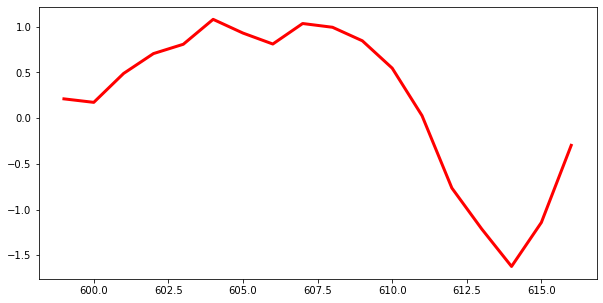

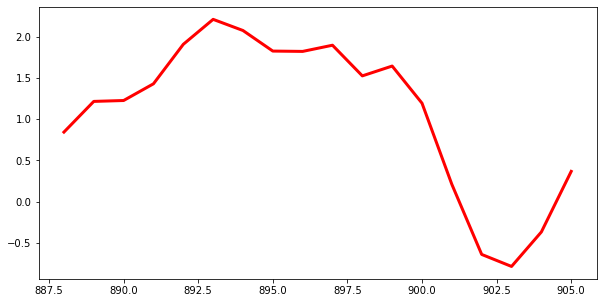

<Figure size 720x360 with 0 Axes>

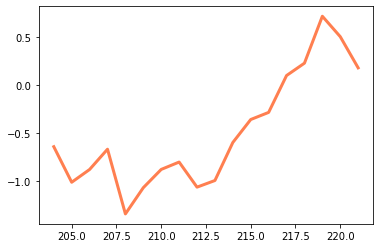

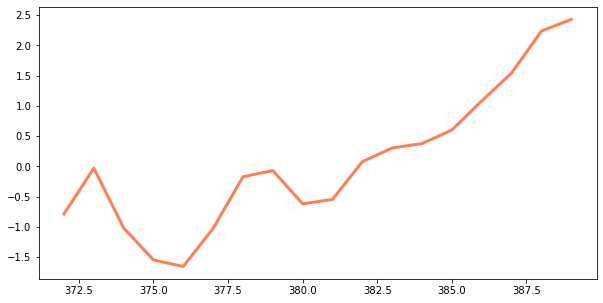

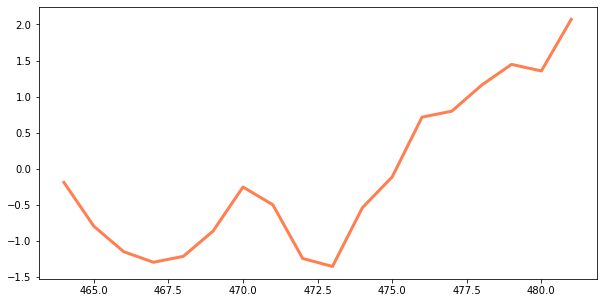

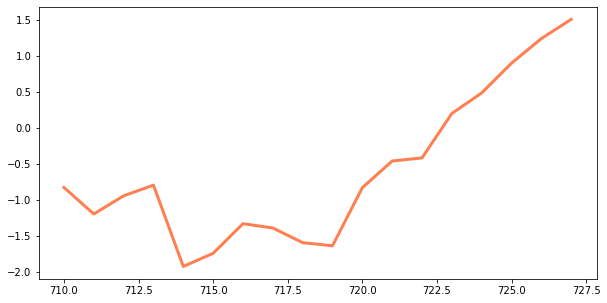

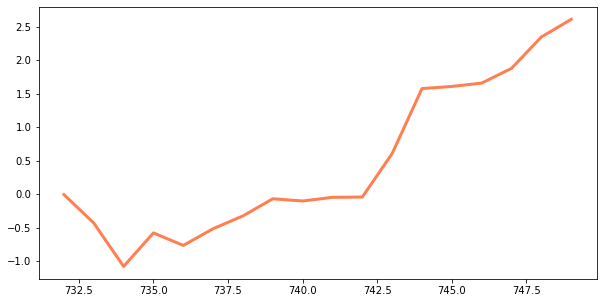

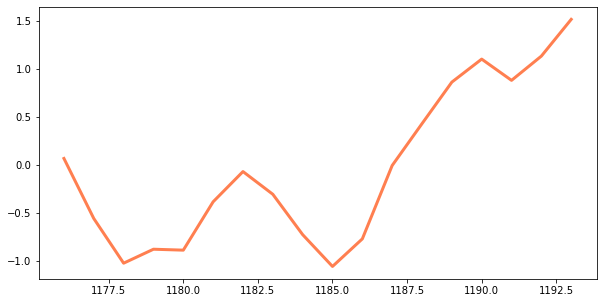

<Figure size 720x360 with 0 Axes>

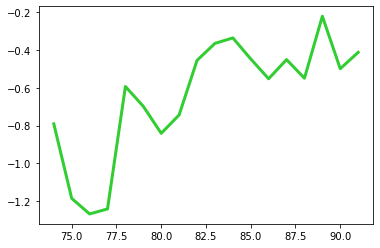

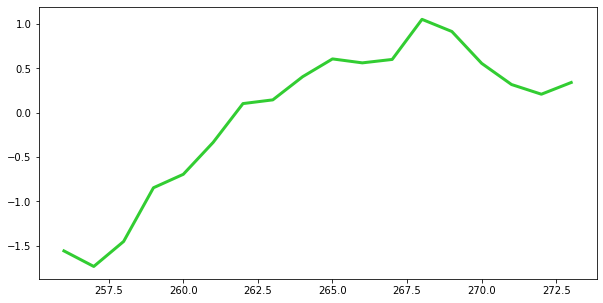

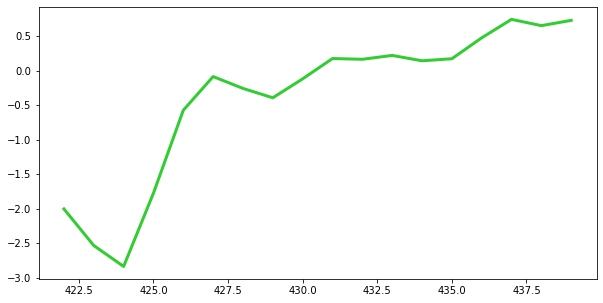

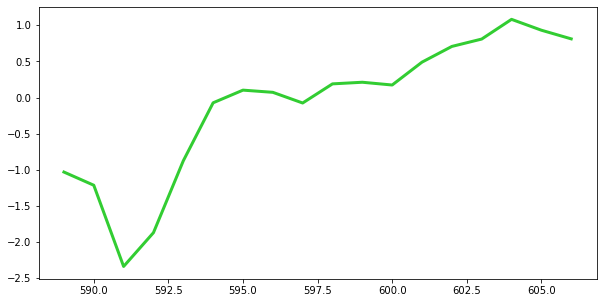

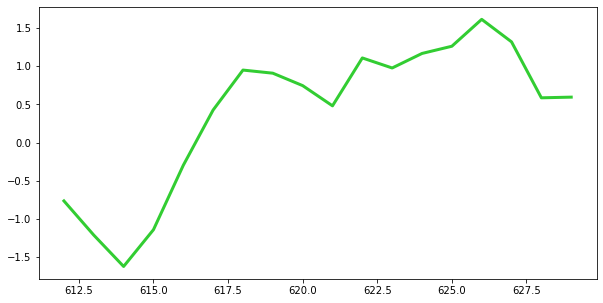

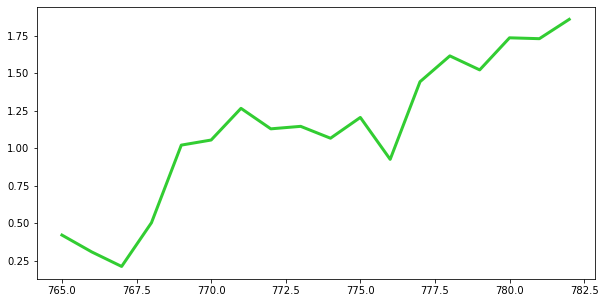

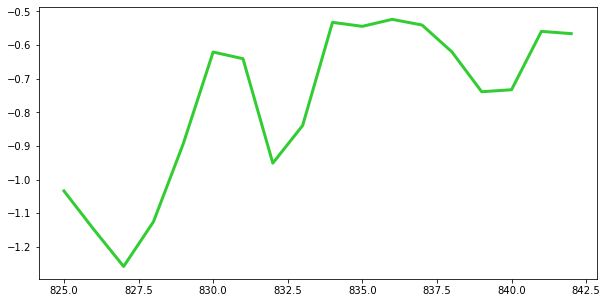

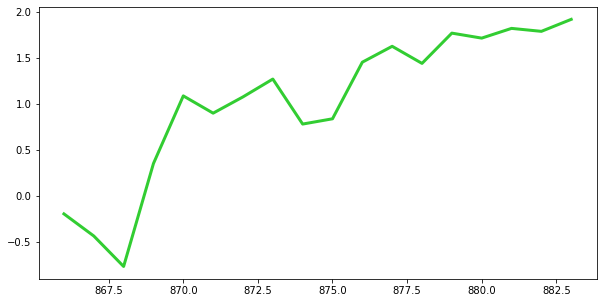

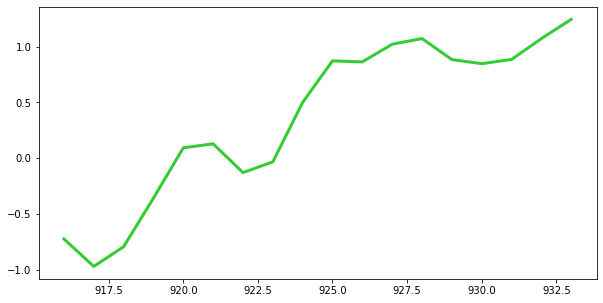

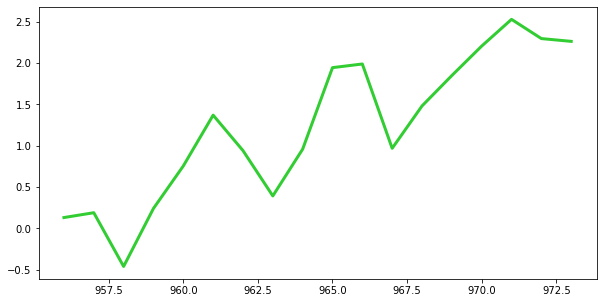

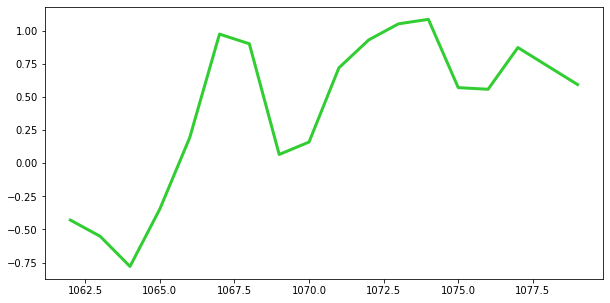

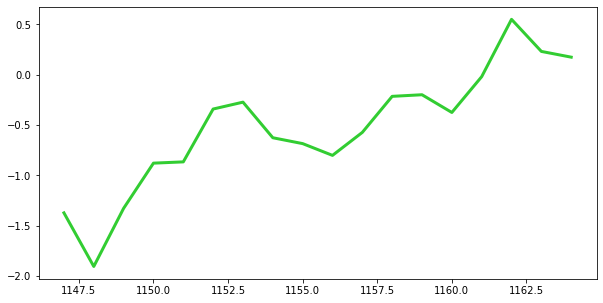

<Figure size 720x360 with 0 Axes>

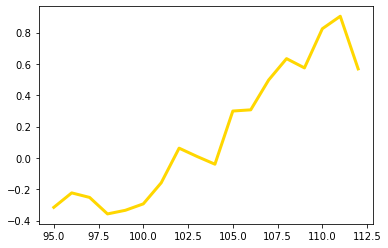

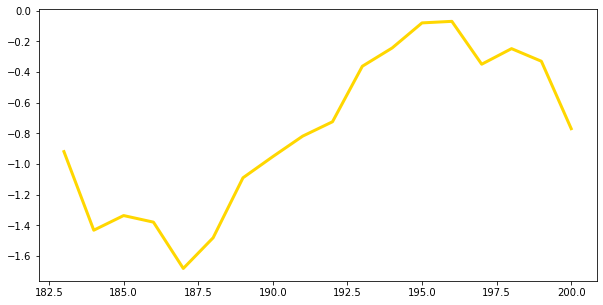

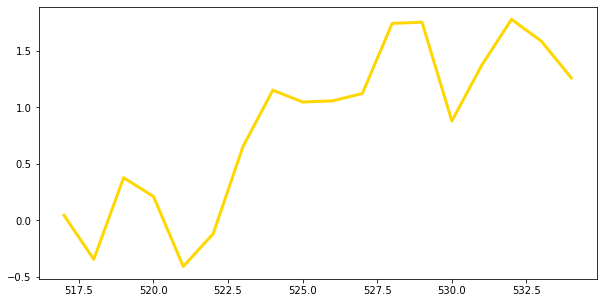

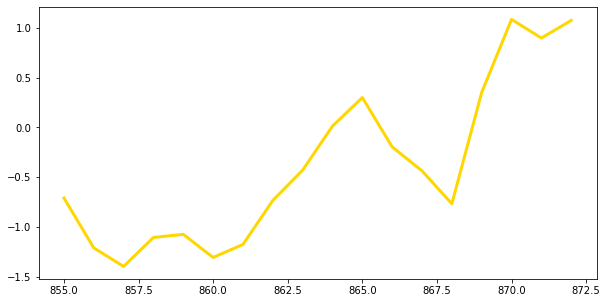

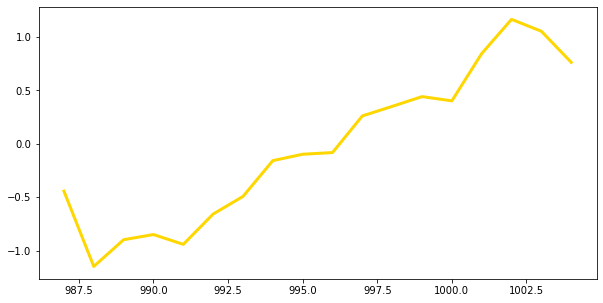

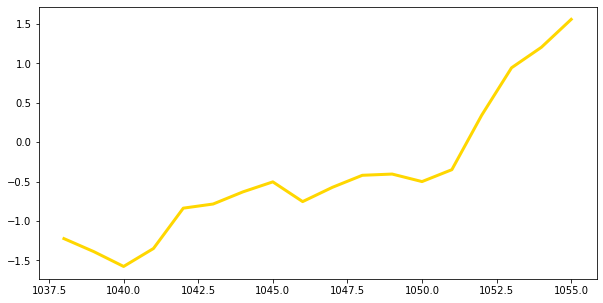

<Figure size 720x360 with 0 Axes>

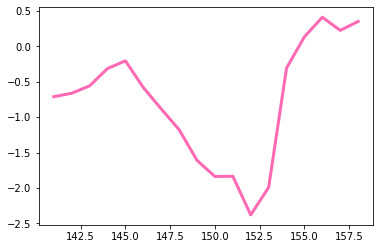

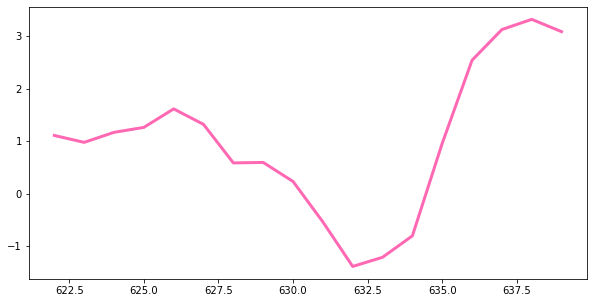

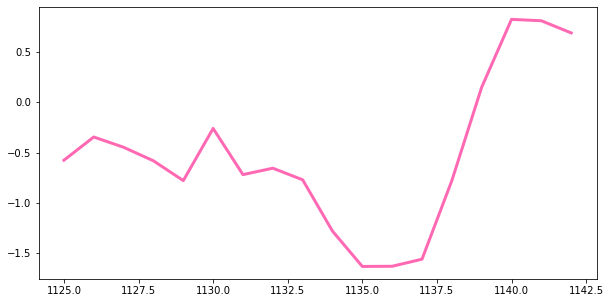

<Figure size 720x360 with 0 Axes>

In [527]:
for m, d, c in zip(mo1, mod1, colors):
    for i in m:
        m_shape = ts1.T.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.figure(figsize=(10,5))
    plt.show()

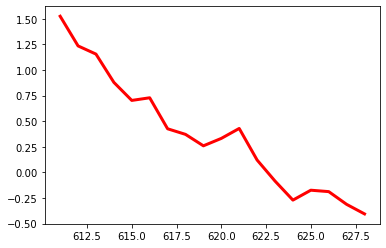

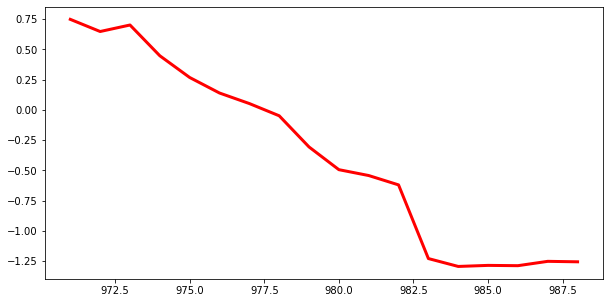

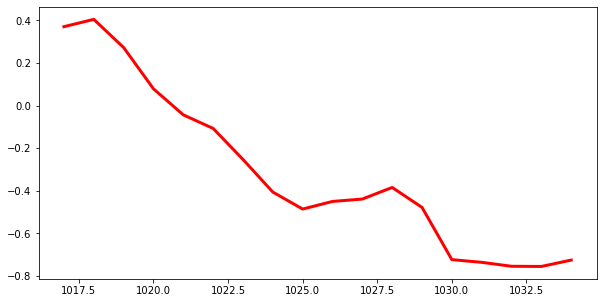

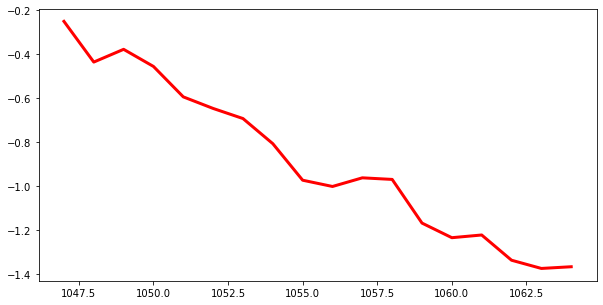

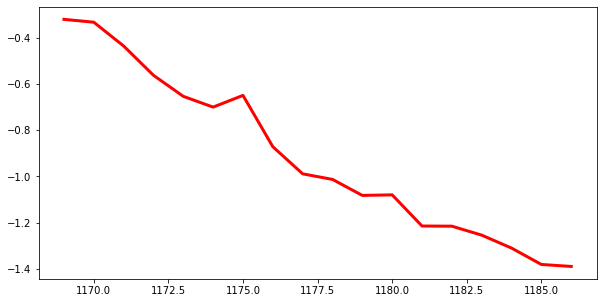

<Figure size 720x360 with 0 Axes>

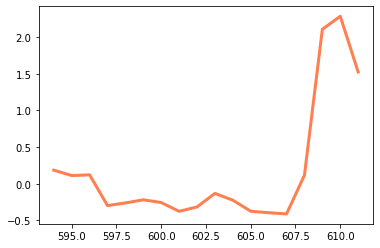

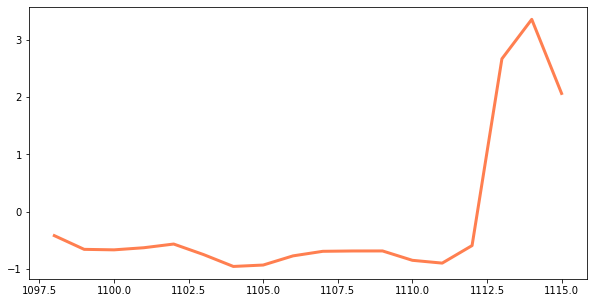

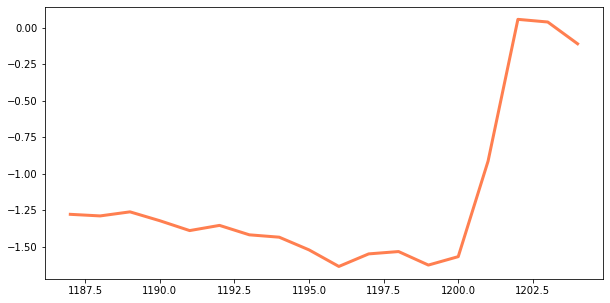

<Figure size 720x360 with 0 Axes>

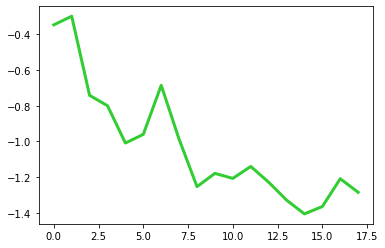

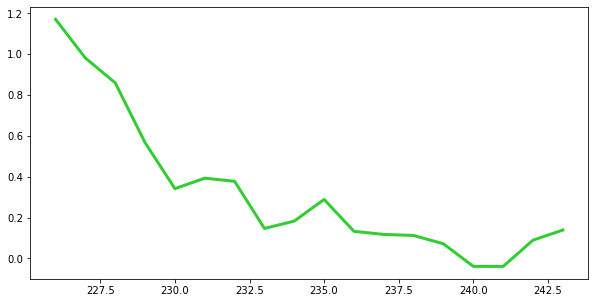

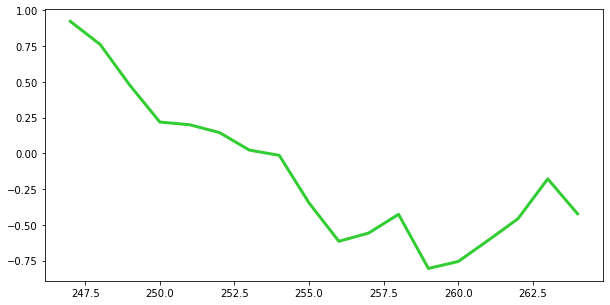

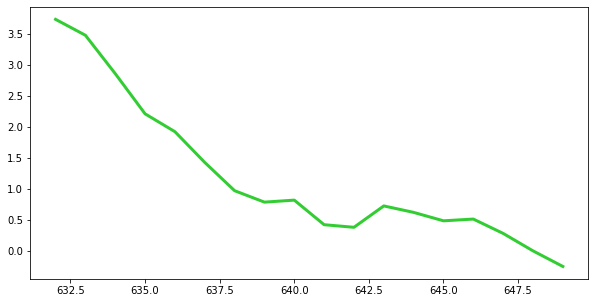

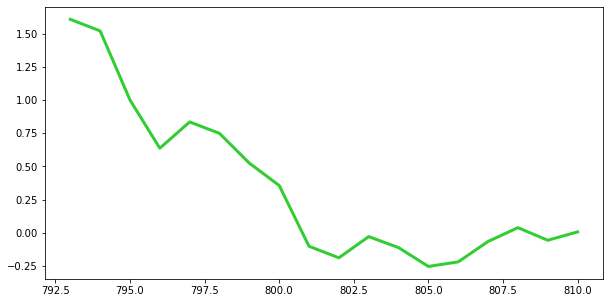

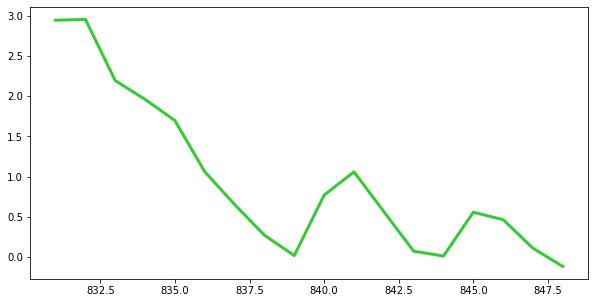

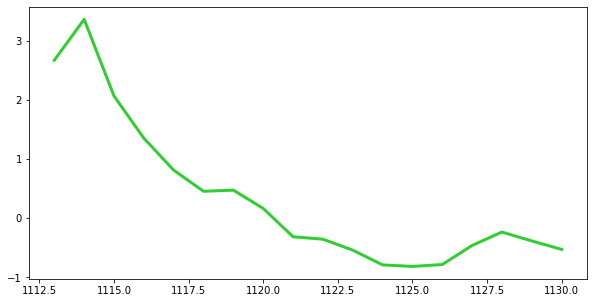

<Figure size 720x360 with 0 Axes>

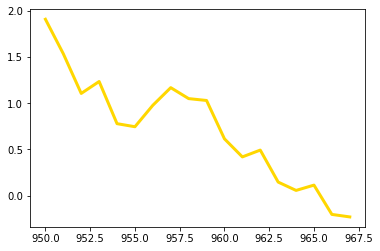

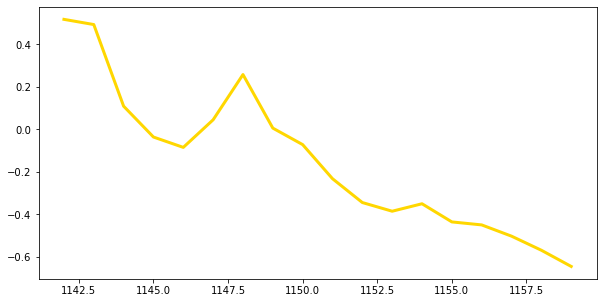

<Figure size 720x360 with 0 Axes>

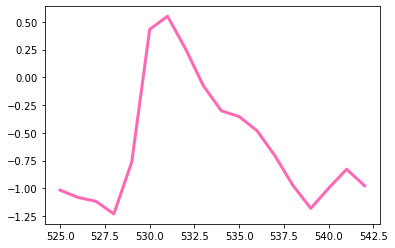

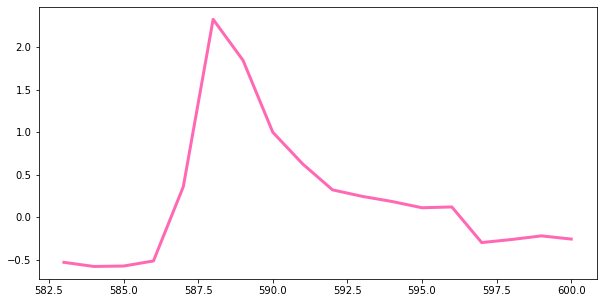

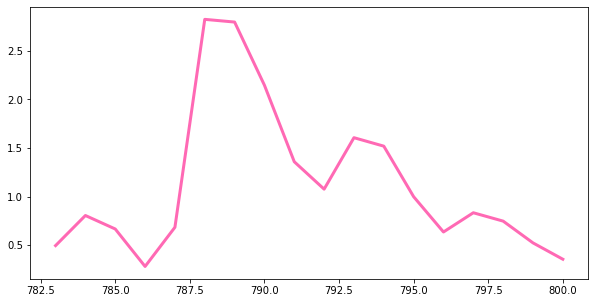

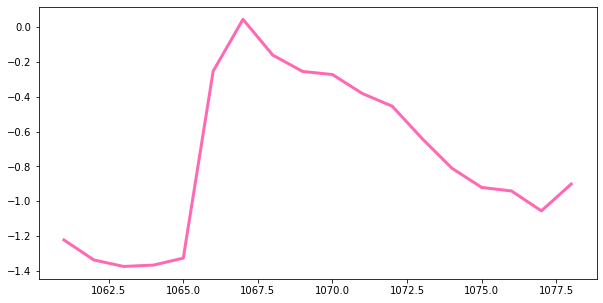

<Figure size 720x360 with 0 Axes>

In [519]:
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape = ts2.T.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.figure(figsize=(10,5))
    plt.show()

# Anomaly Discovery

In [488]:
from matrixprofile.discords import discords

In [489]:
anoms1 = discords(mp1, ex_zone=3, k=3)
anoms2 = discords(mp2, ex_zone=3, k=3)

In [490]:
print('Old-Time/Historic discords:',anoms1)
print('Classical discords:',anoms2)

Old-Time/Historic discords: [835 838 286]
Classical discords: [291 868 284]


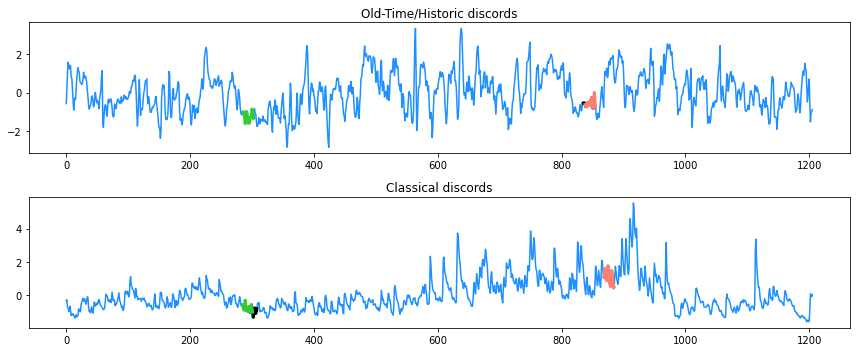

In [530]:
fig,ax=plt.subplots(2,1,figsize=(12,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T),color='dodgerblue')
colors = ['k', 'salmon', 'limegreen', 'b', 'y'][:len(mo1)]
for a, c in zip(anoms1, colors):
    a_shape = ts1.T.values[a:a+w]
    ax[0].plot(range(a, a+w), a_shape, color=c, lw=3)
    ax[0].set_title('Old-Time/Historic discords')

ax[1].plot(np.squeeze(ts2.to_numpy().T),color='dodgerblue')
colors = ['k', 'salmon', 'limegreen', 'b', 'y'][:len(mo2)]
for a, c in zip(anoms2, colors):
    a_shape = ts2.T.values[a:a+w]
    ax[1].plot(range(a, a+w), a_shape, color=c, lw=3)
    ax[1].set_title('Classical discords')
    
plt.tight_layout()    
plt.show()